# Child Poverty Classification


The US Census Demographic Data is a dataset available on Kaggle (https://www.kaggle.com/datasets/muonneutrino/us-census-demographic-data) that provides information on the demographics of the US population based on the 2017 Census. The dataset contains information on various demographic and socioeconomic variables at the level of census tracts.

The objective of this notebook is data exploration and preparation


##**1. Load, Balance, and Split**

###**1.1 Importing Dataset and Packages**

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.model_selection import train_test_split
from scipy.special import expit
import sys
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',500)

###**1.2 Load**
The output below shows how many observations are missing values for each feature. 1,283 incomplete cases are dropped from the dataset, leaving 72,718 complete cases. 

In [122]:
# Import data
acs_data = pd.read_csv("acs2017_census_tract_data.csv")

print(acs_data.isna().sum())
print(f"There are {acs_data[acs_data.isnull().any(axis=1)].shape[0]} out of {acs_data.shape[0]} incomplete cases.")
# Remove NAs from dataset
acs_data = acs_data.dropna(subset=['ChildPoverty']).reset_index(drop=True)
acs_data.head(3)

TractId                0
State                  0
County                 0
TotalPop               0
Men                    0
Women                  0
Hispanic             696
White                696
Black                696
Native               696
Asian                696
Pacific              696
VotingAgeCitizen       0
Income              1116
IncomeErr           1116
IncomePerCap         745
IncomePerCapErr      745
Poverty              842
ChildPoverty        1110
Professional         811
Service              811
Office               811
Construction         811
Production           811
Drive                801
Carpool              801
Transit              801
Walk                 801
OtherTransp          801
WorkAtHome           801
MeanCommute          946
Employed               0
PrivateWork          811
PublicWork           811
SelfEmployed         811
FamilyWork           811
Unemployment         810
dtype: int64
There are 1283 out of 74001 incomplete cases.


,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,1407,67826.0,14560.0,33018.0,6294.0,10.7,20.8,38.5,15.6,22.8,10.8,12.4,94.2,3.3,0.0,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,1652,41287.0,3819.0,18996.0,2453.0,22.4,35.8,30.5,24.9,22.9,6.3,15.4,90.5,9.1,0.0,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,2480,46806.0,9496.0,21236.0,2562.0,14.7,21.1,27.9,19.4,33.3,9.9,9.6,88.3,8.4,0.0,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7


In [123]:
X = acs_data.iloc[:,0:-1].drop(columns=['ChildPoverty'])
y = acs_data[['ChildPoverty']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [124]:
# unique, counts = np.unique(y_train, return_counts=True)
# unique_test, counts_test = np.unique(y_test, return_counts=True)

# print(unique, counts)
# print(unique_test, counts_test)

In [125]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

Y column is encoded as integers as instructed by the TA.

In [126]:
# y_train_num = y_train.copy()
# y_test_num = y_test.copy()
# y_train_num["ChildPoverty_Quantized"] = y_train["ChildPoverty_Quantized"].map({'Low': 0, 'Medium Low': 1, 'Medium High': 2, 'High': 3})
# y_test_num["ChildPoverty_Quantized"] = y_test["ChildPoverty_Quantized"].map({'Low': 0, 'Medium Low': 1, 'Medium High': 2, 'High': 3})

### Missing values treatment

<AxesSubplot:>

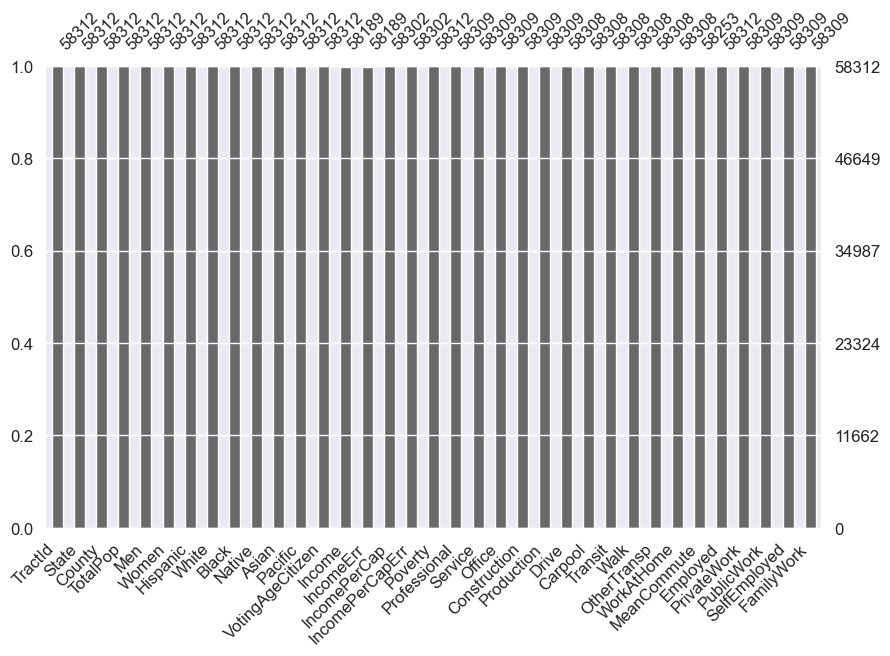

In [127]:
missingno.bar(X_train, figsize=(10,6), fontsize=12)

In [128]:
X_train.head(3)

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork
0,41011001100,Oregon,Coos County,5759,2860,2899,2.3,88.5,0.0,2.9,0.2,0.0,4743,31928.0,2614.0,28134.0,9092.0,22.4,25.2,25.2,12.5,23.5,13.6,60.8,27.6,0.3,4.3,0.4,6.5,35.7,1813,64.8,17.8,17.4,0.0
1,6037104124,California,Los Angeles County,4317,2228,2089,52.0,29.4,10.8,0.7,4.6,0.0,2985,81078.0,9573.0,30733.0,4430.0,5.1,45.6,15.8,20.0,11.1,7.5,69.0,12.5,9.9,3.3,2.8,2.4,36.7,1984,78.5,13.7,7.8,0.0
2,32003001612,Nevada,Clark County,6964,3671,3293,46.3,29.5,17.0,0.0,4.6,0.7,4499,26902.0,6766.0,15568.0,1975.0,21.9,14.1,36.1,22.5,14.0,13.3,69.7,9.6,9.2,2.7,3.5,5.3,24.9,2876,86.4,10.2,3.3,0.0


In [129]:
from sklearn.impute import KNNImputer


county and state names are encoded as integers in ascending alphabetically. 

In [130]:
counties_int_map = dict(zip(np.unique(X_train['County']), np.arange(len(np.unique(X_train['County'])))))
X_train['County'] = X_train['County'].map(counties_int_map)
state_int_map = dict(zip(np.unique(X_train['State']), np.arange(len(np.unique(X_train['State'])))))
X_train['State'] = X_train['State'].map(state_int_map)

In [131]:
X_test['County'] = X_test['County'].map(counties_int_map)
X_test['State'] = X_test['State'].map(state_int_map)

In [132]:
X_train_mod=pd.DataFrame()
X_test_mod=pd.DataFrame()
imputer_dict={}
for x in X_train['State'].unique():
    imputer = KNNImputer(n_neighbors=1, weights="uniform")
    df = pd.DataFrame(imputer.fit_transform(X_train[X_train['State'] == x])) 
    X_train_mod = pd.concat([X_train_mod,df])
    imputer_dict[x]=imputer
for x in imputer_dict:
    imputer = imputer_dict[x]
    df = pd.DataFrame(imputer.fit_transform(X_test[X_test['State'] == x])) 
    X_test_mod = pd.concat([X_test_mod,df])

In [133]:
X_train_mod.columns = X_train.columns
X_test_mod.columns = X_test.columns
X_train_mod.isna().sum()

TractId             0
State               0
County              0
TotalPop            0
Men                 0
Women               0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
dtype: int64

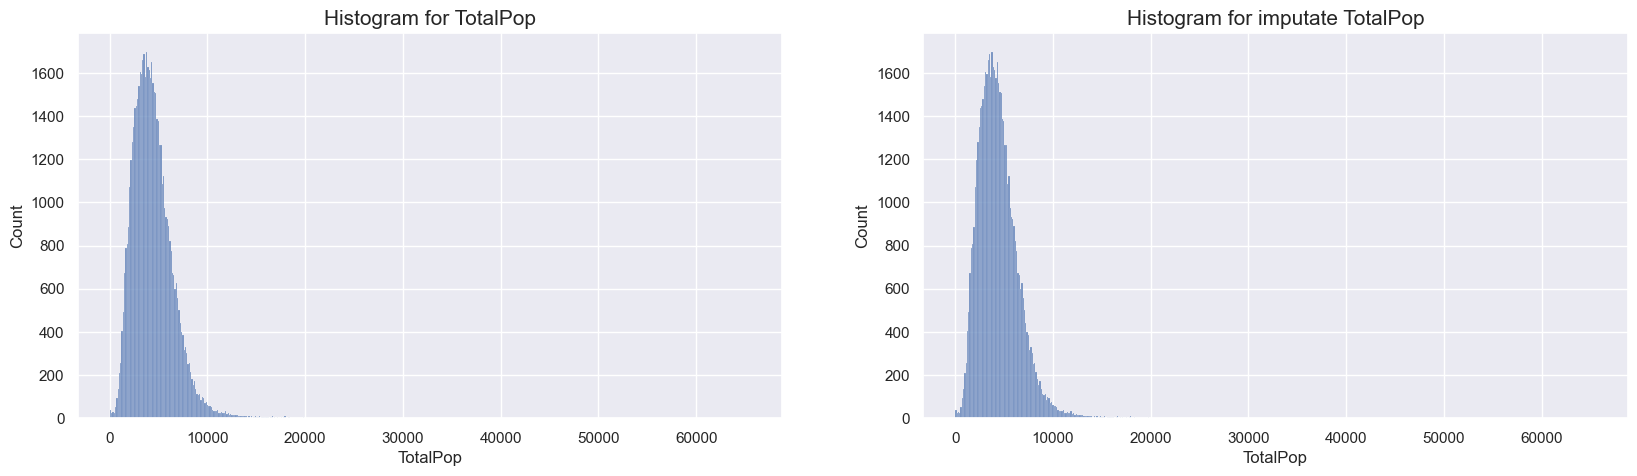

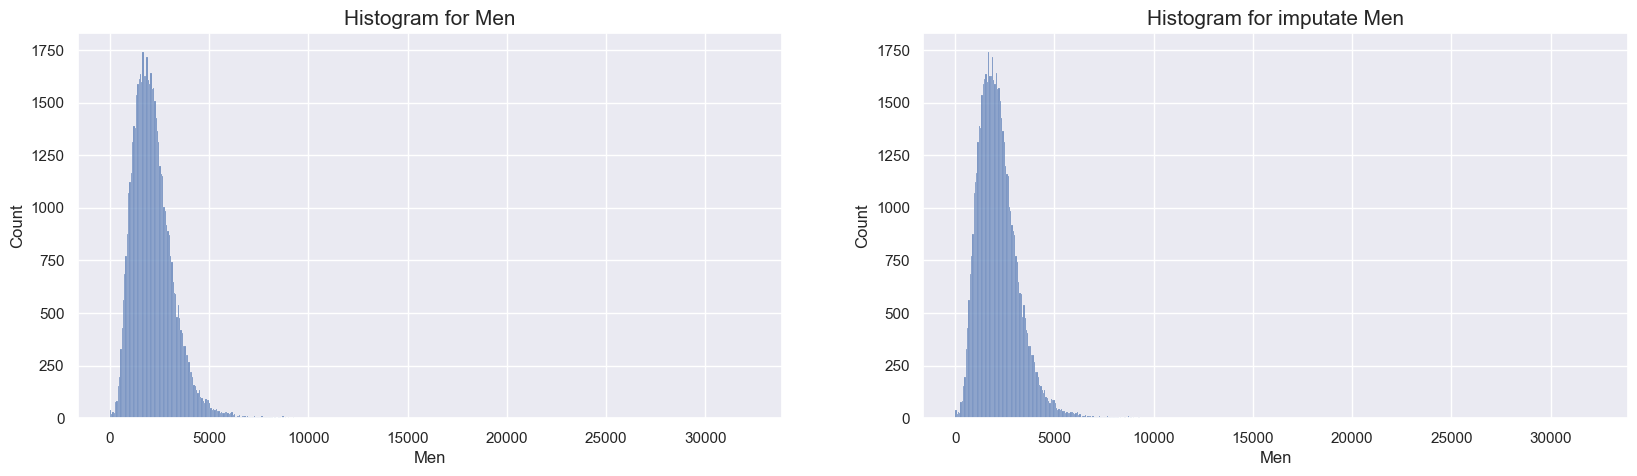

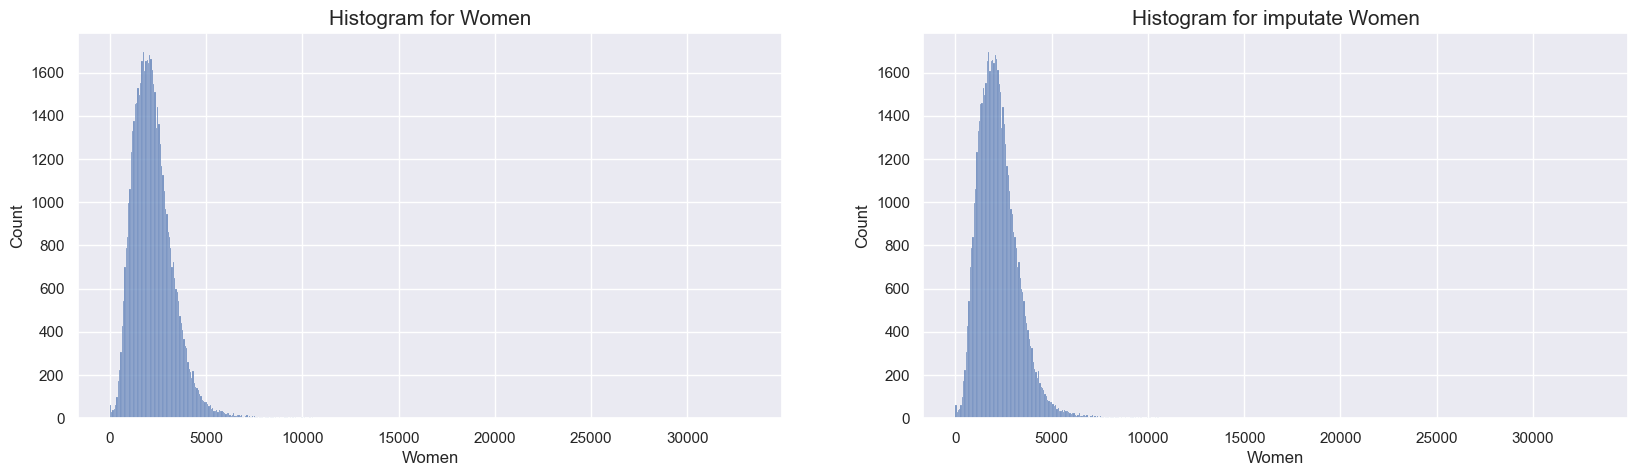

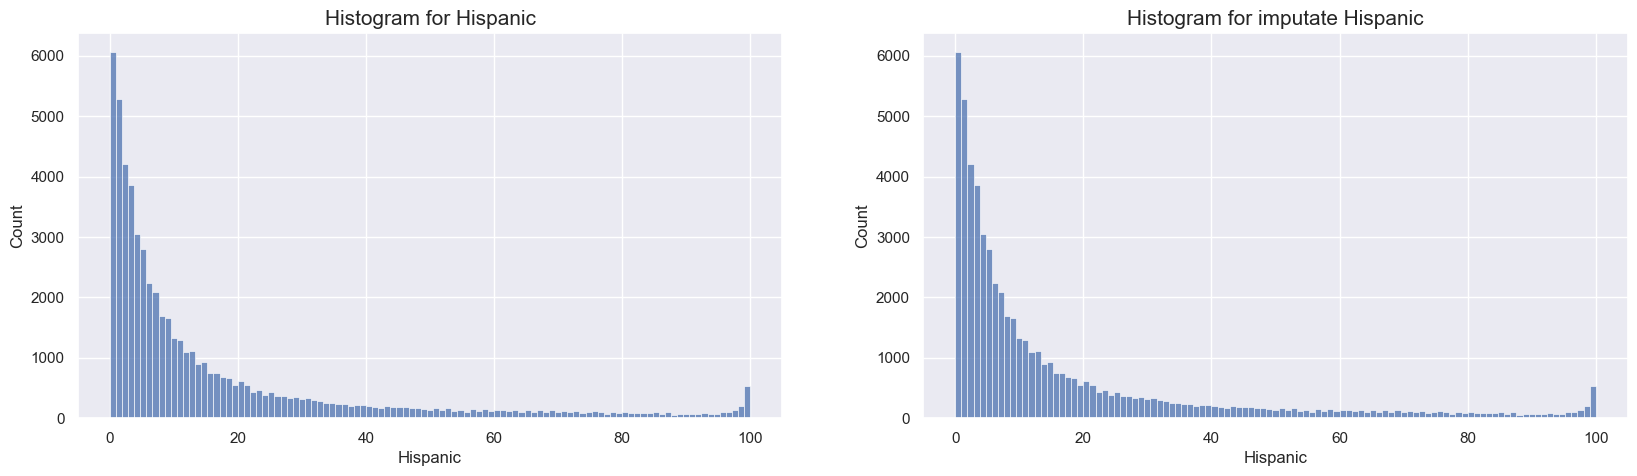

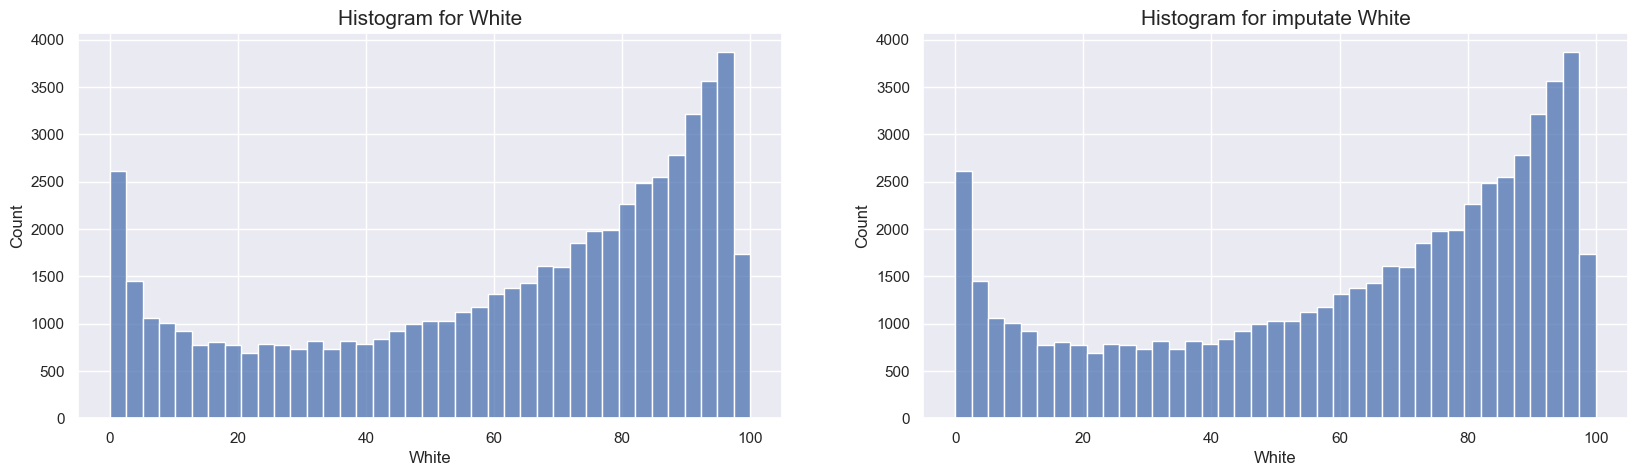

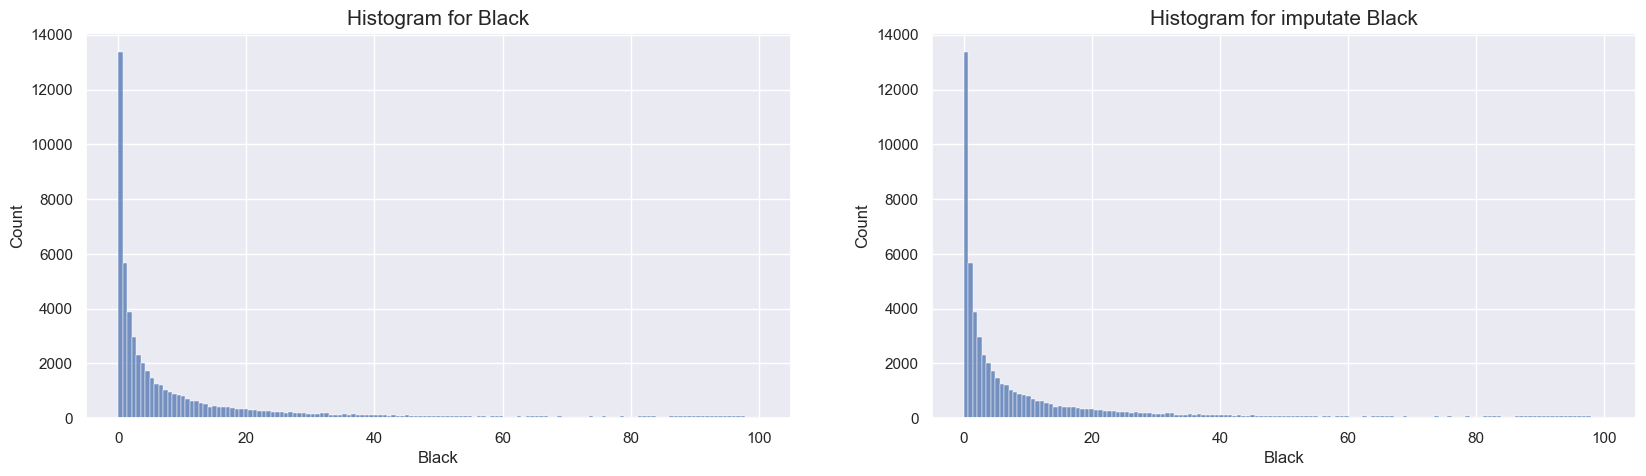

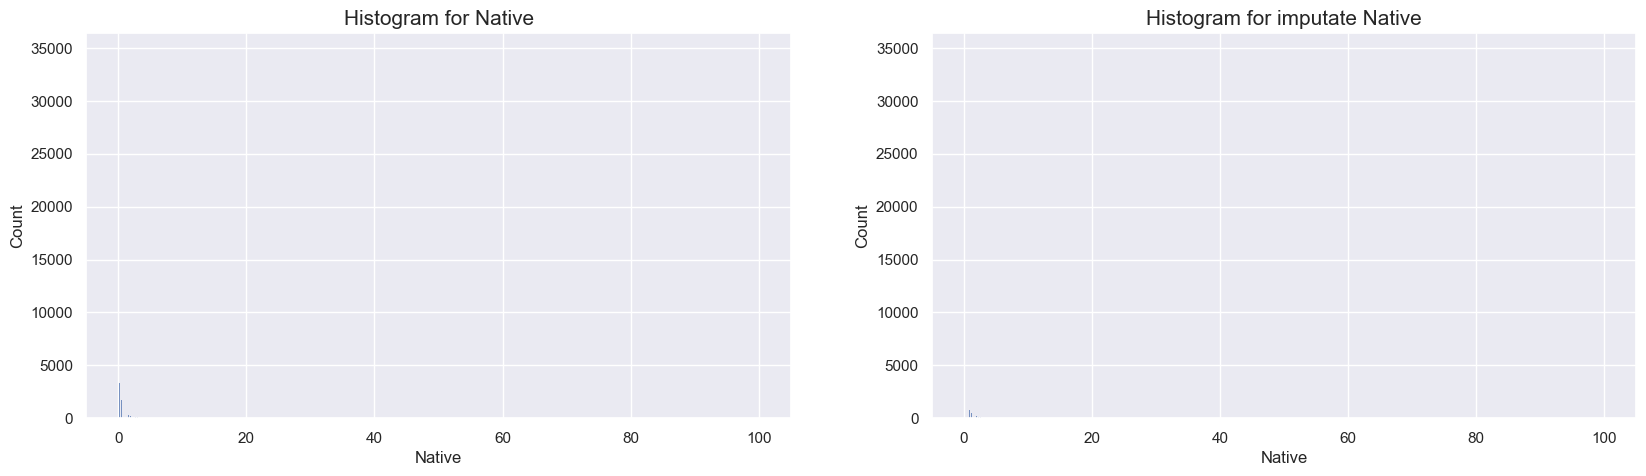

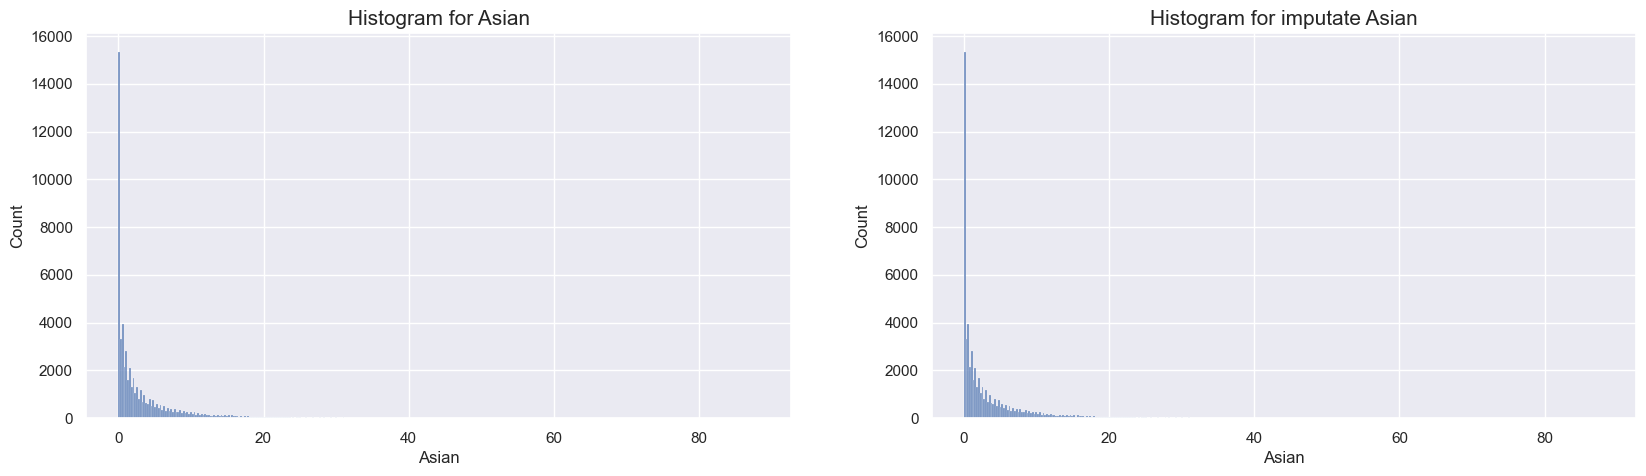

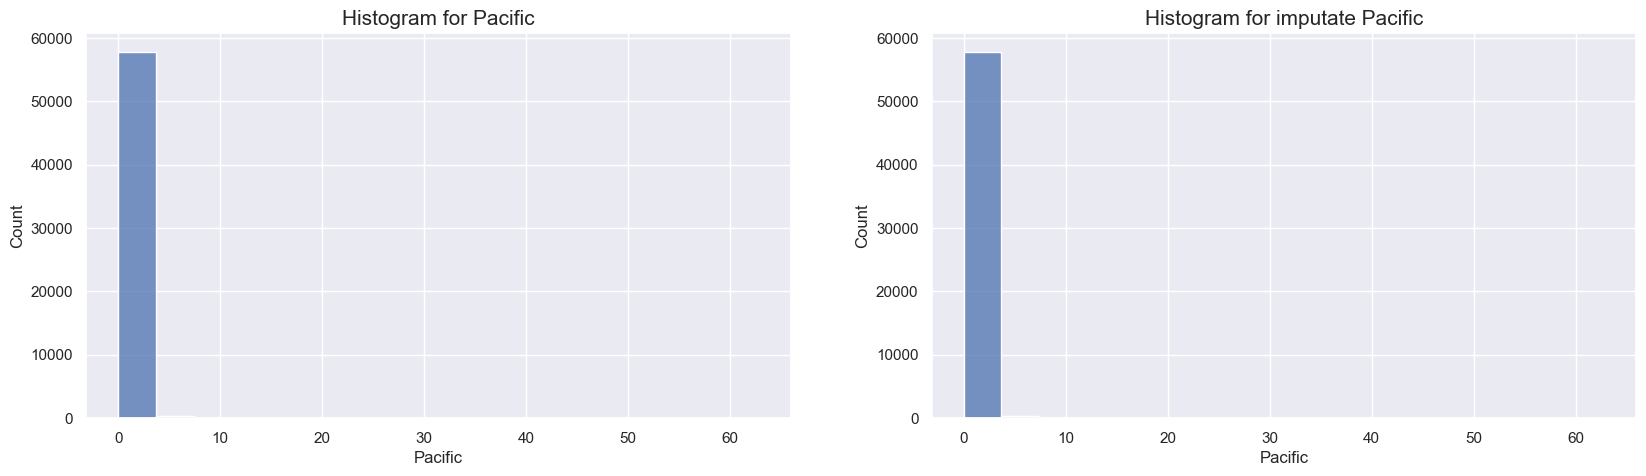

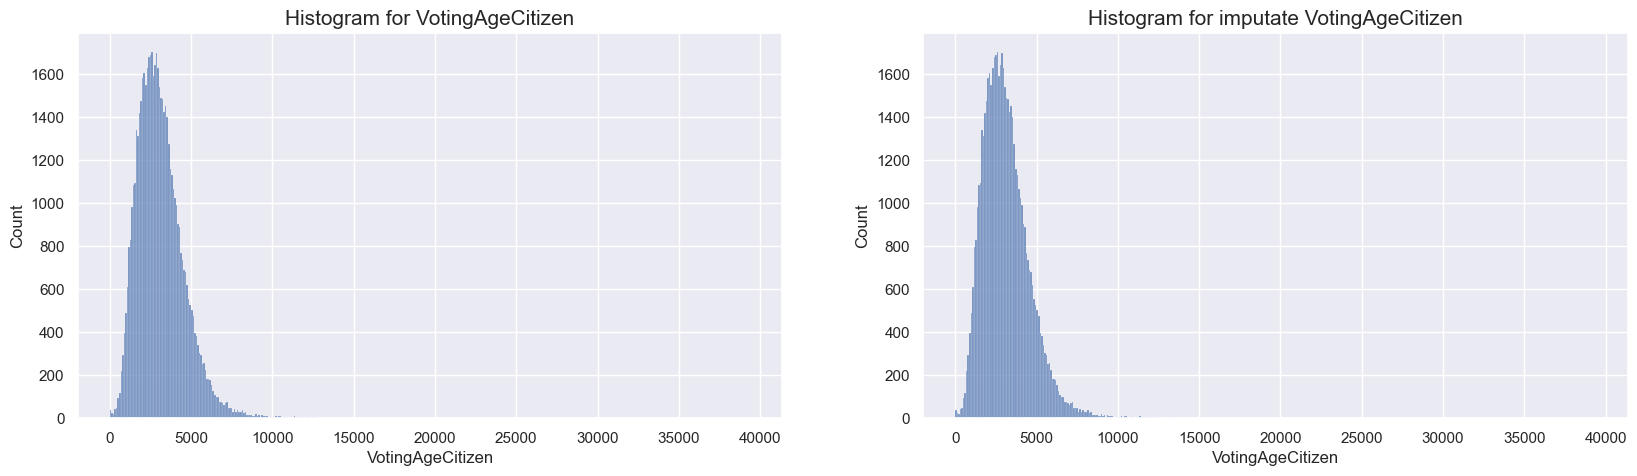

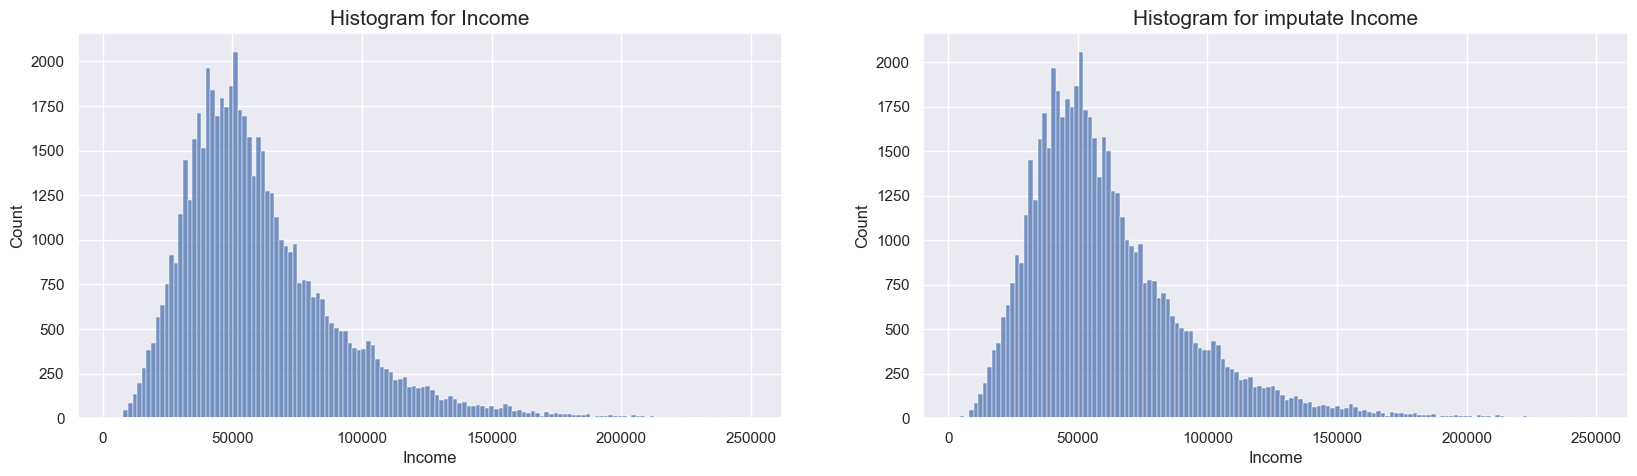

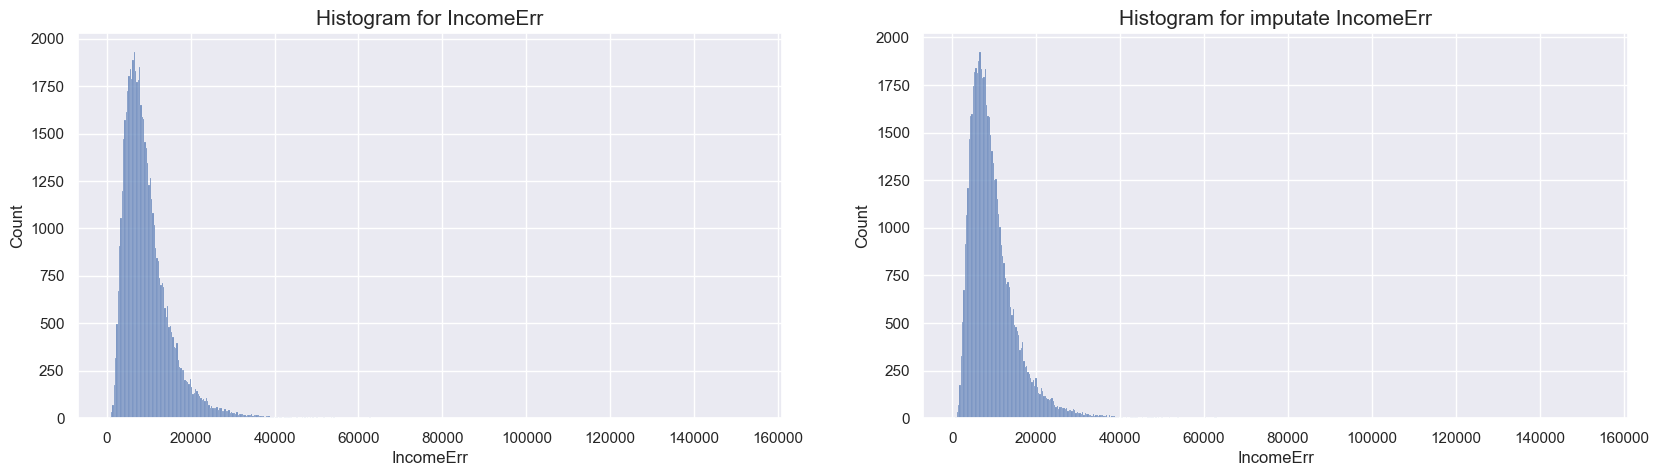

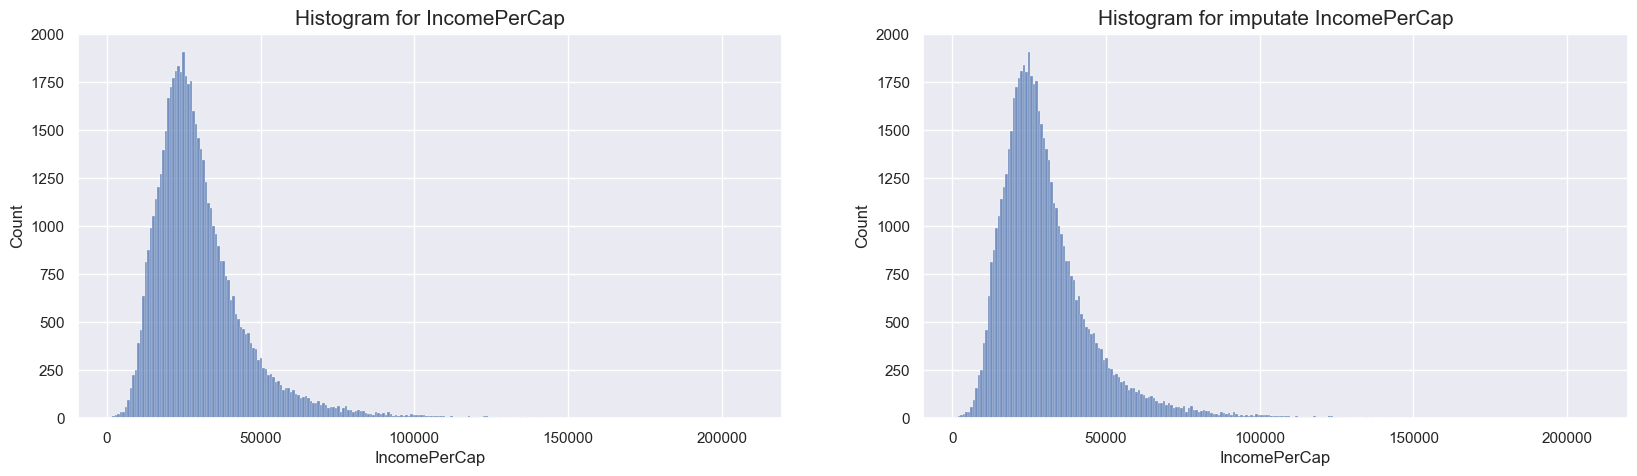

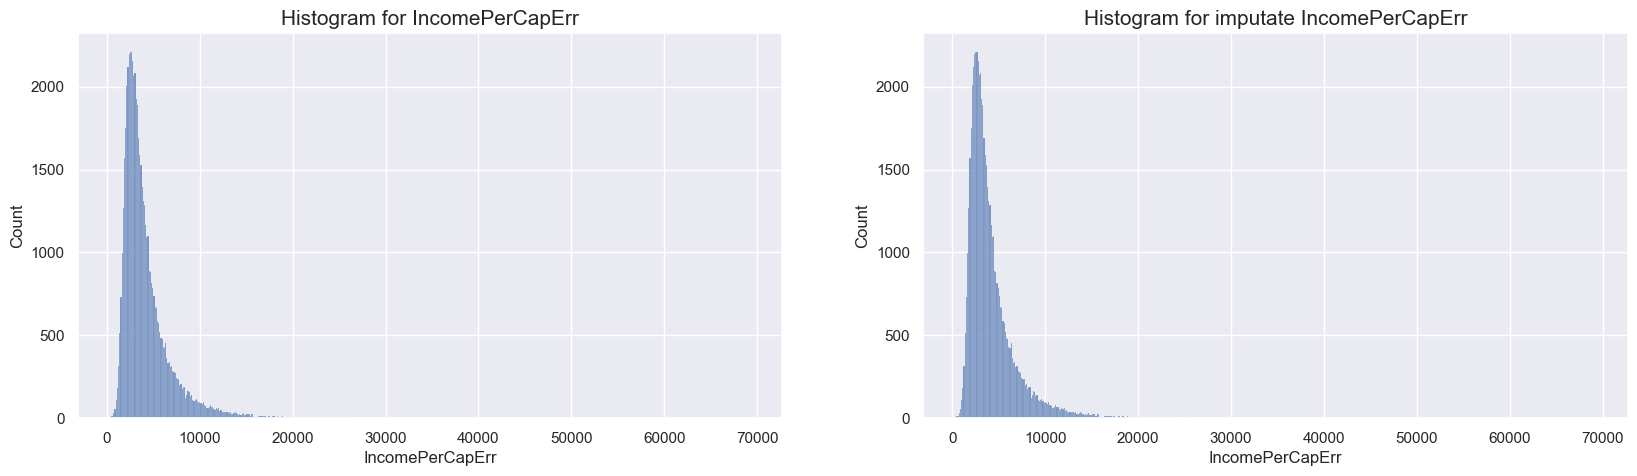

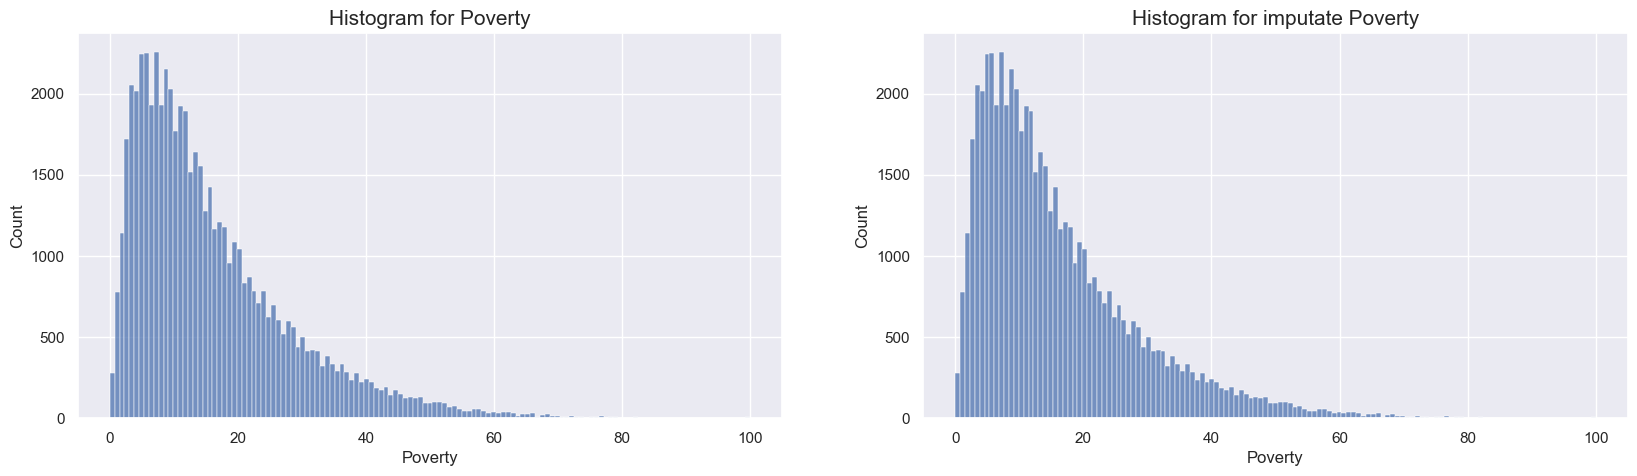

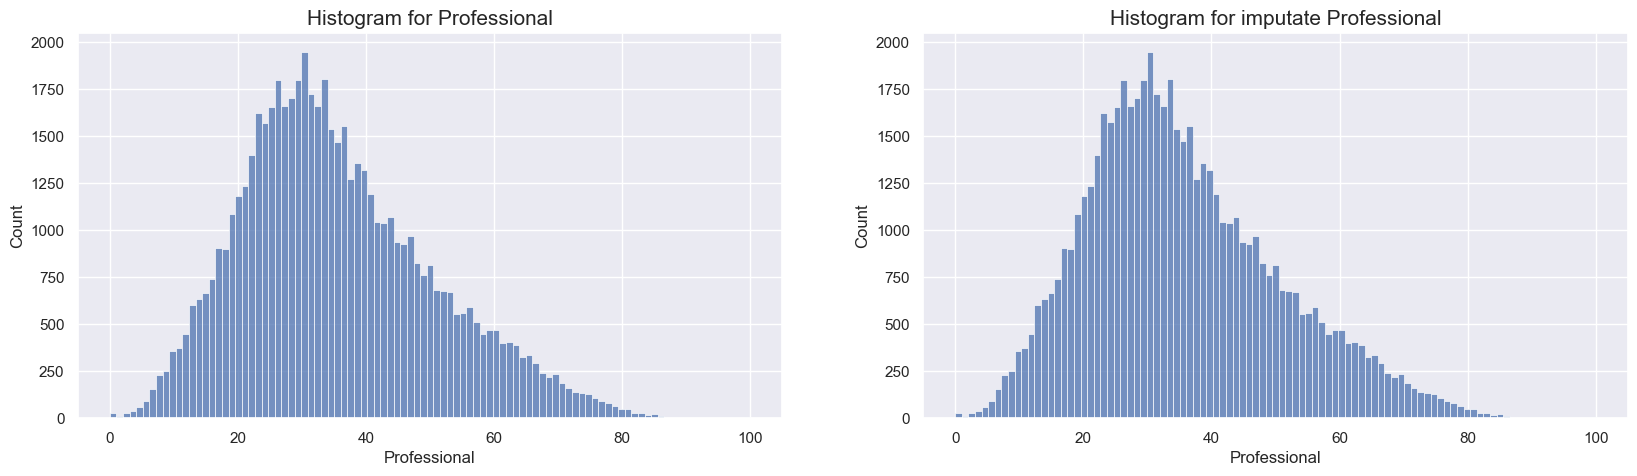

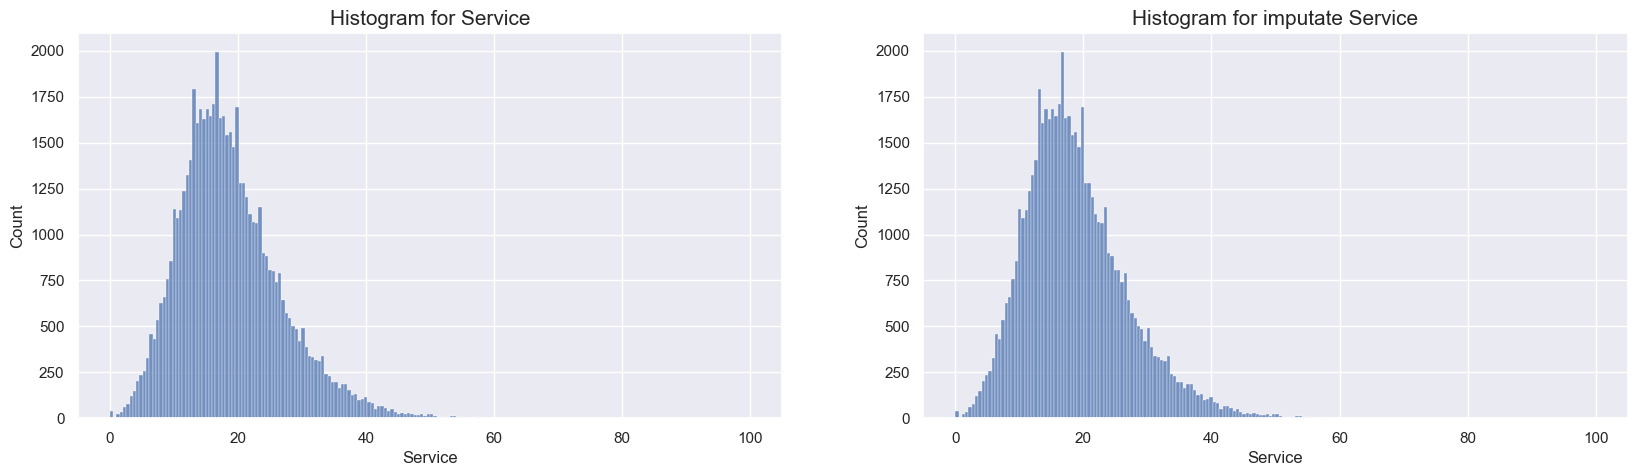

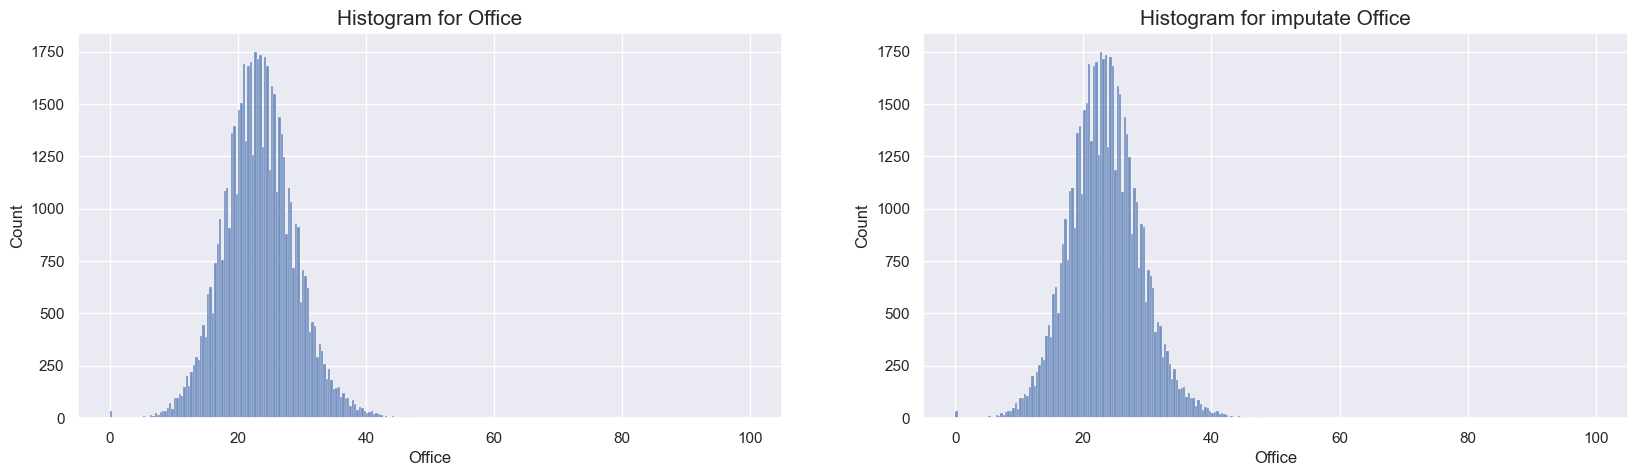

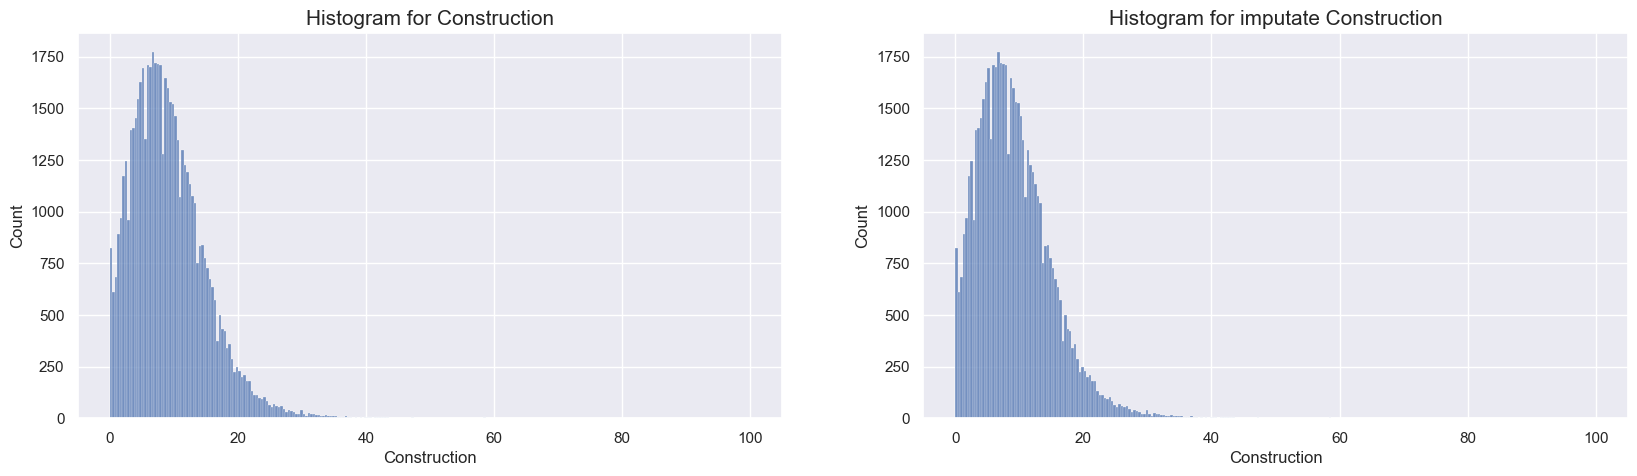

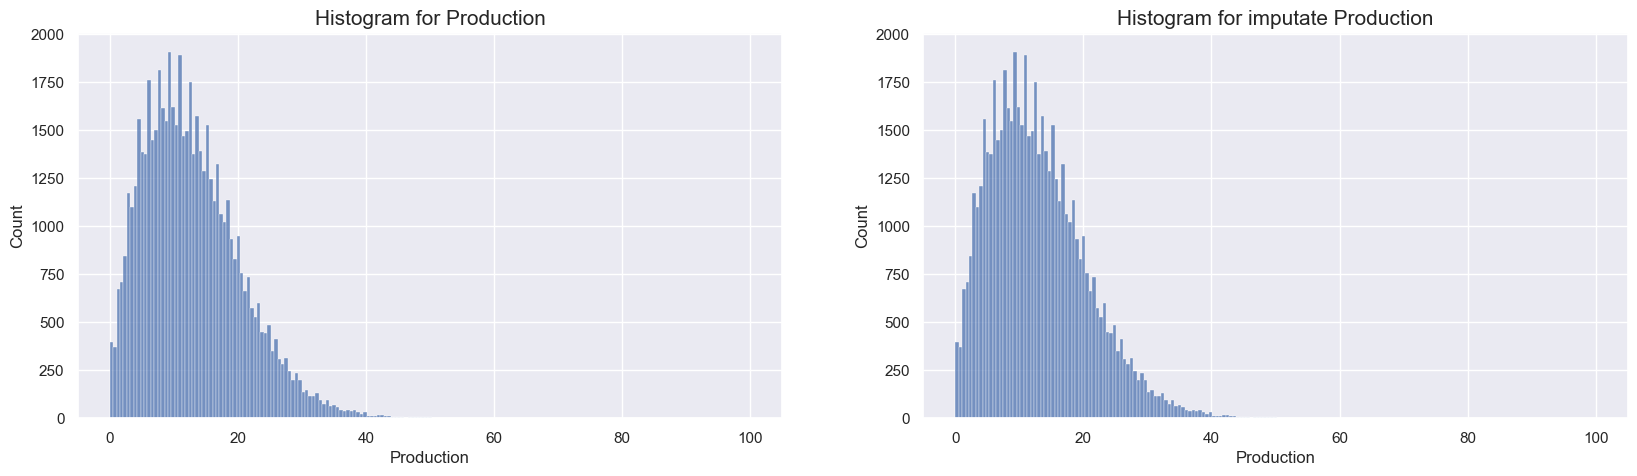

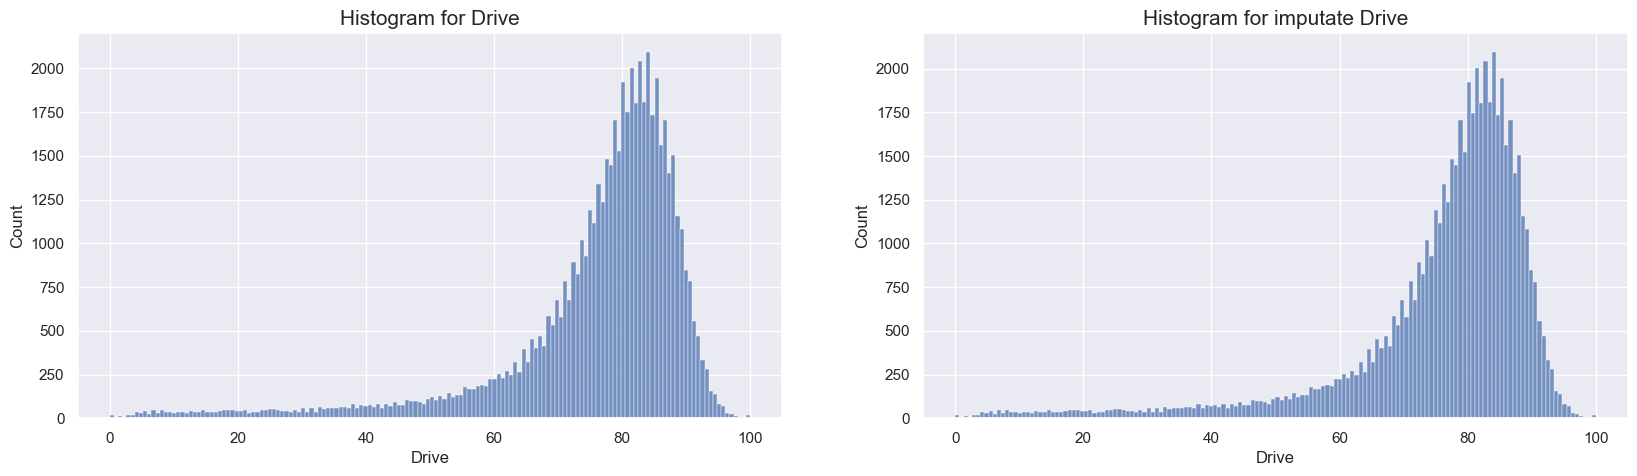

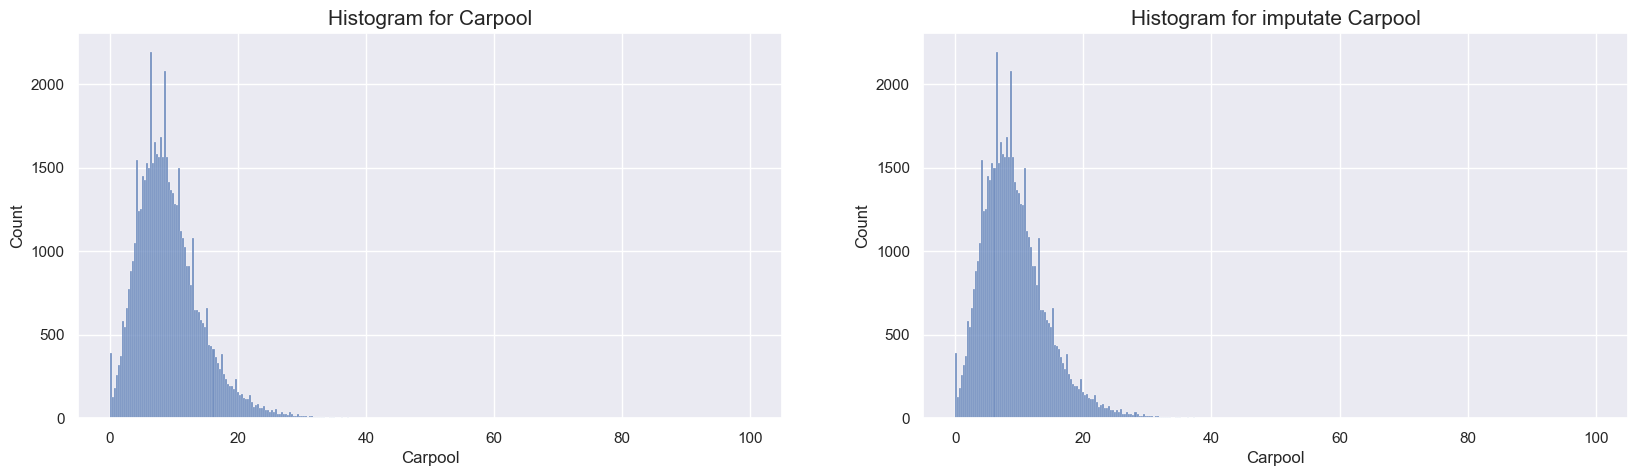

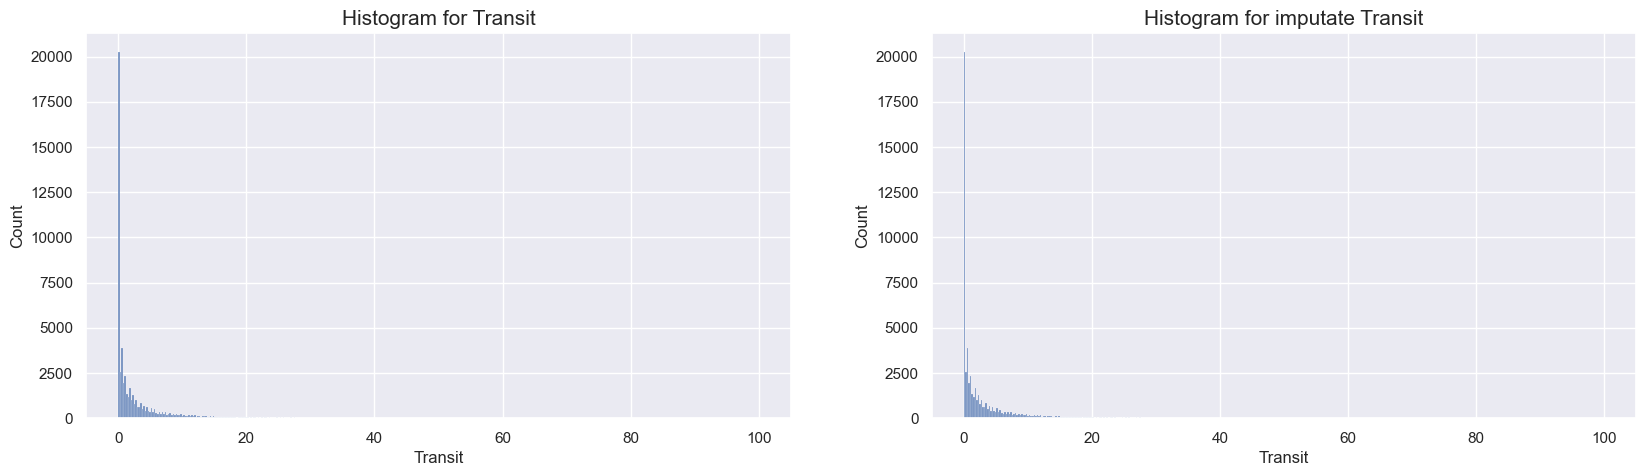

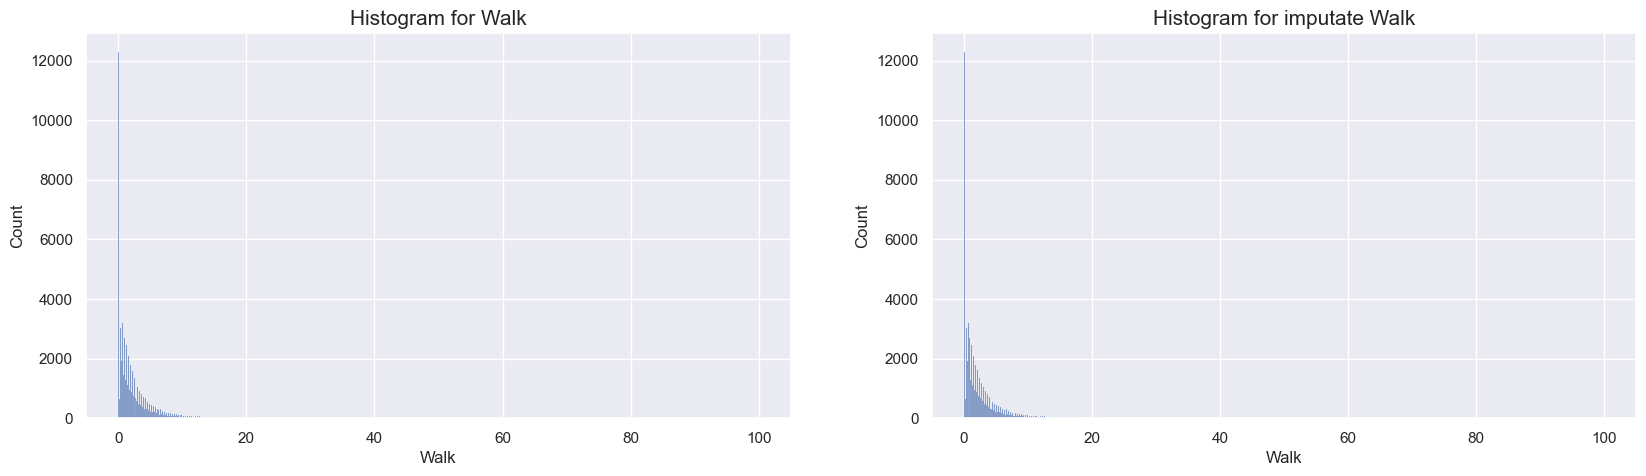

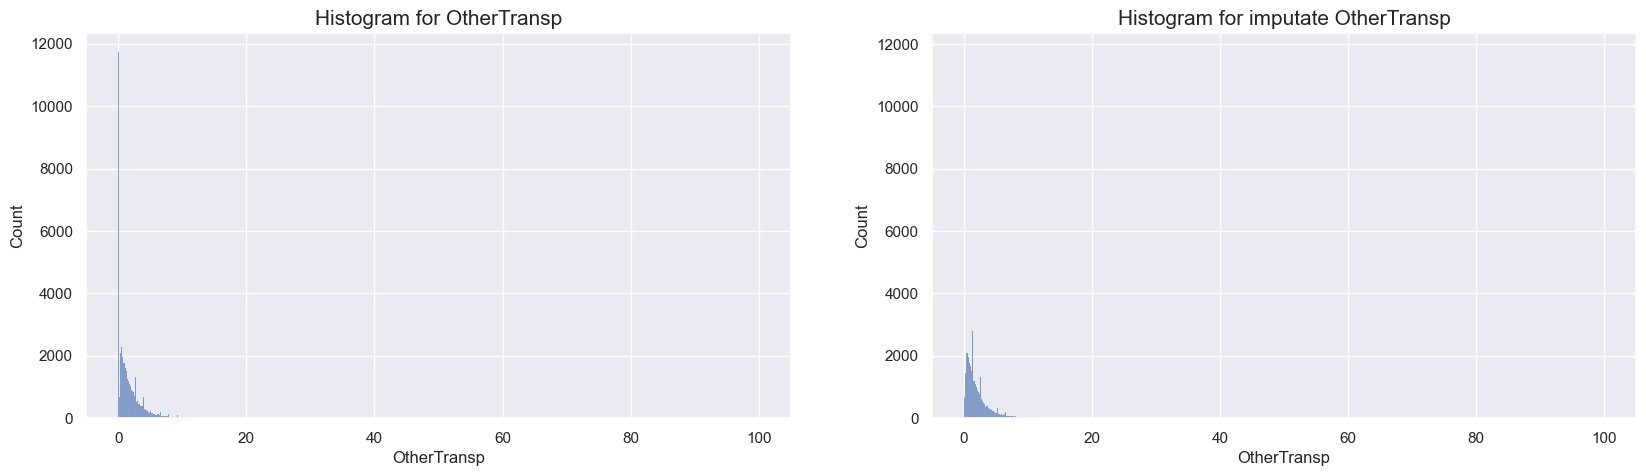

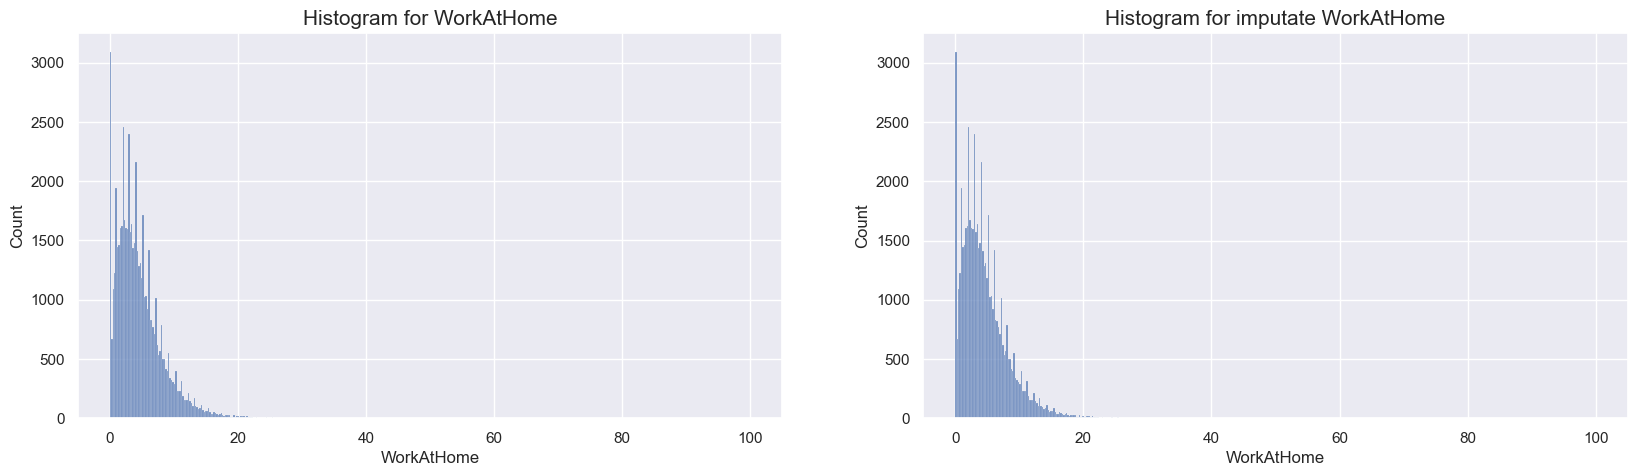

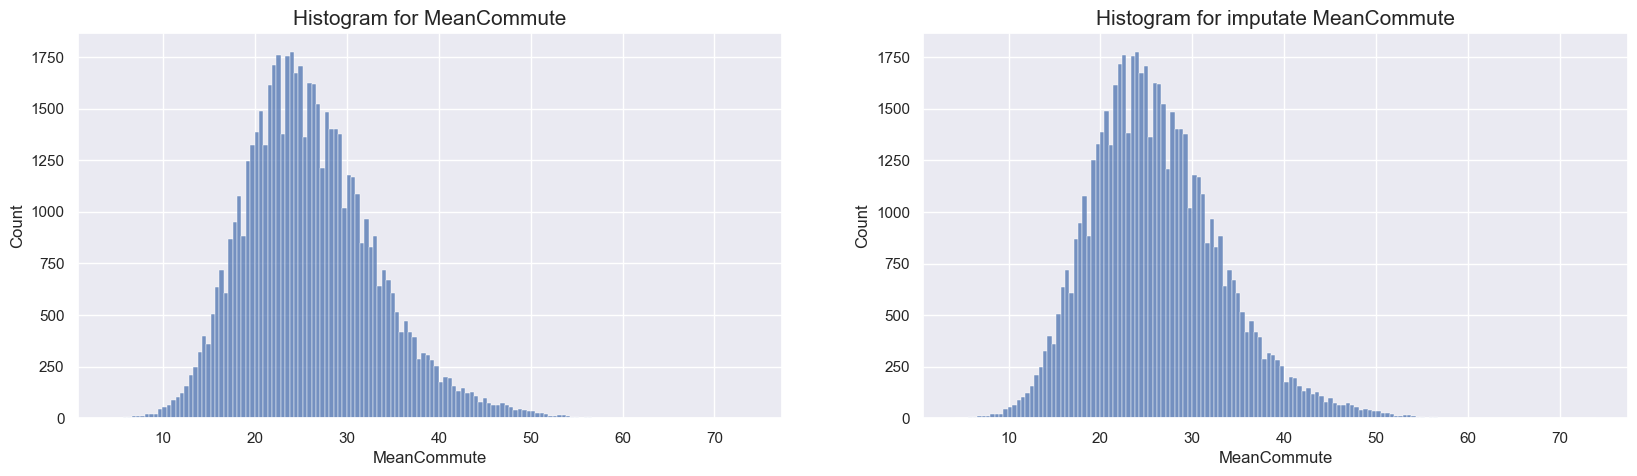

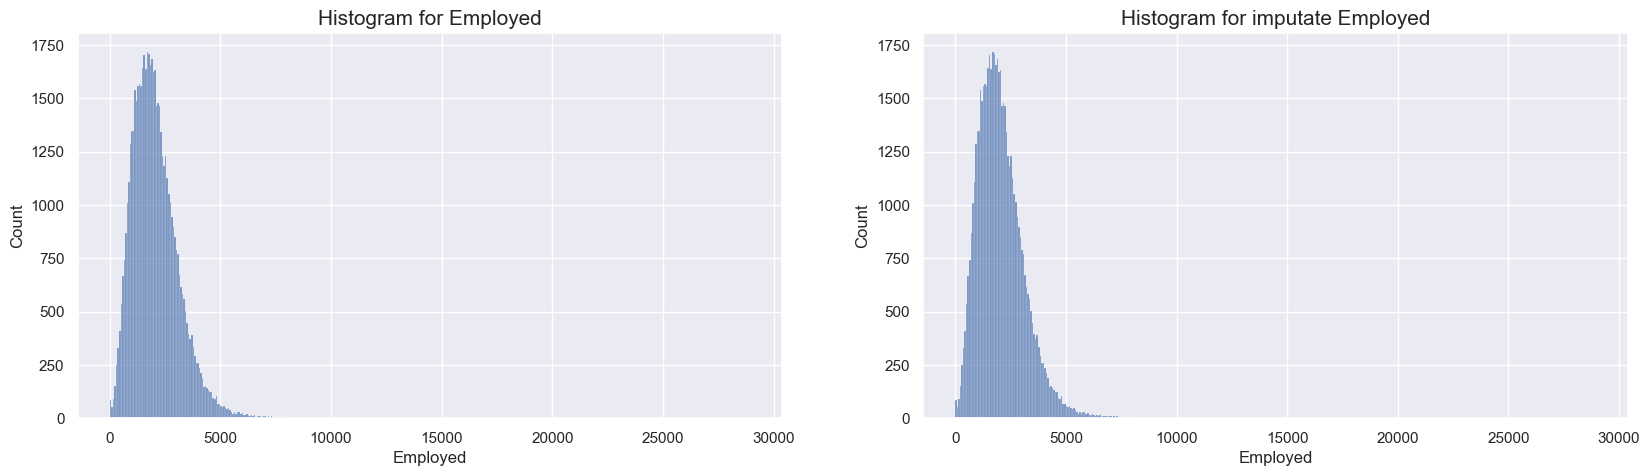

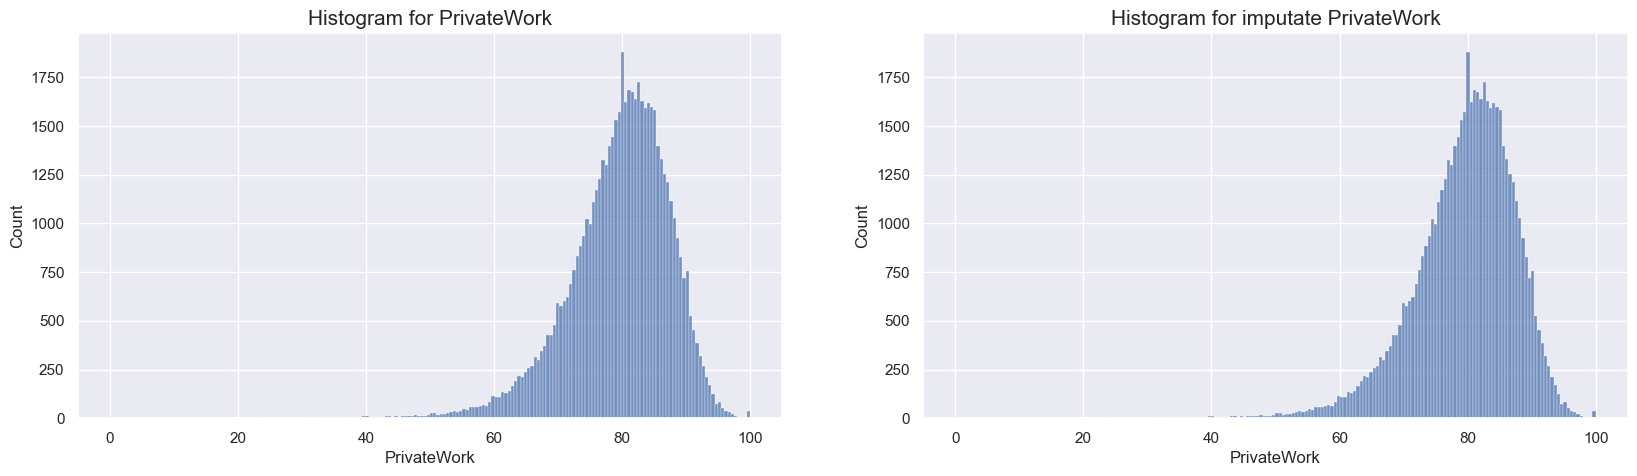

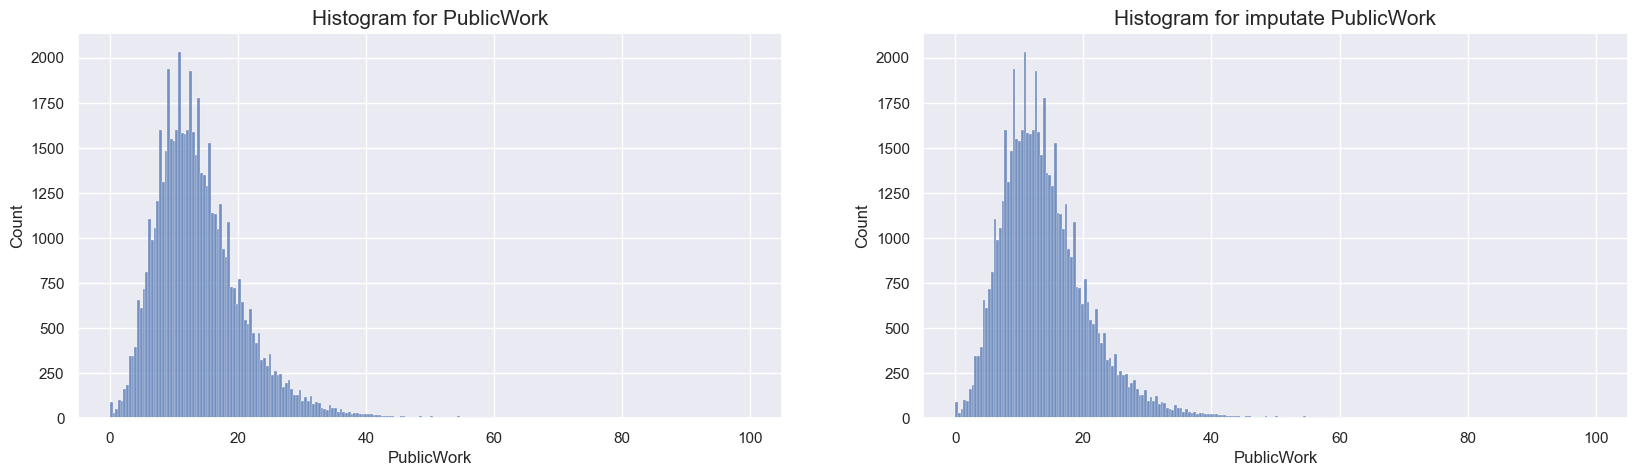

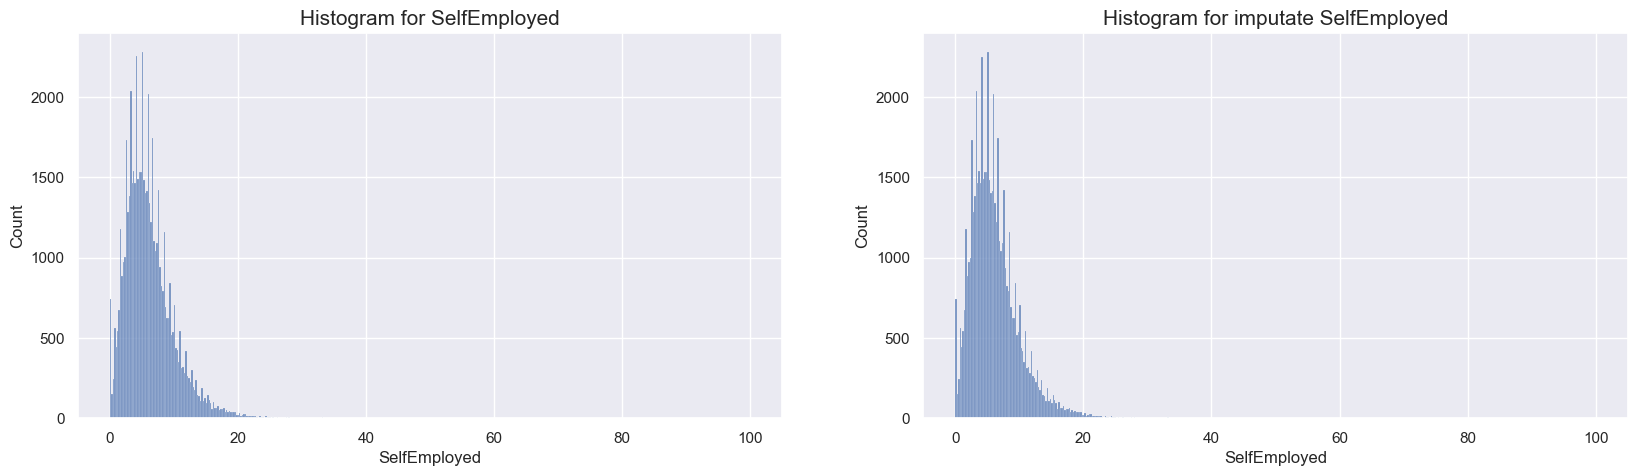

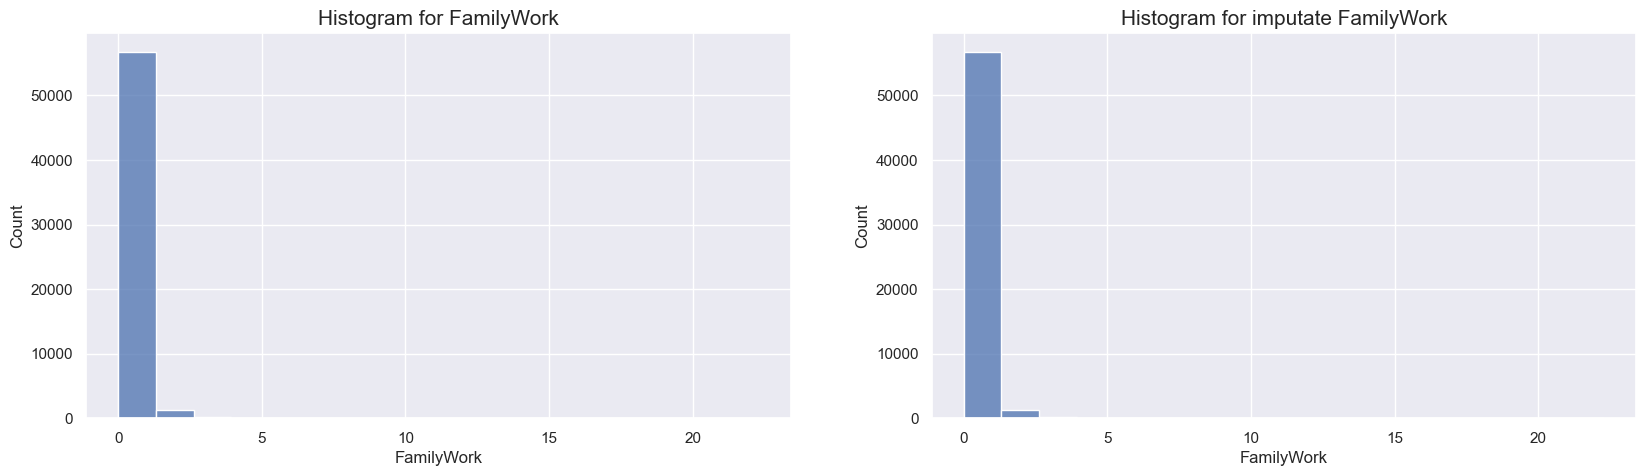

In [134]:
for col in X_train_mod.iloc[:,3:].columns:
    plt.figure(figsize=(20,5))
    ax1 = plt.subplot(1,2,1)
    ax2 = plt.subplot(1,2,2)
    
    sns.histplot(X_train[col],
                ax = ax1)
    ax1.set_title("Histogram for "+col, fontsize = 15)
    sns.histplot(X_train_mod[col],
                ax = ax2)
    ax2.set_title("Histogram for imputate "+col ,fontsize = 15)

There are 1954 different counties present in the dataset. Such a large number of one-hot-encoded columns for each unique string would drastically increase the dimensionality of the dataset. Although county might by a strong indicator of child poverty rate, we will use one hot encoding and then apply embeddings to reduce the dimentionality. 

In [135]:
X_train_mod.shape

(58312, 35)

###**1.3 Balance**

The data were quantized by finding the thresholds that equally divide the Child Poverty variable into 4 levels. This was accomplished by sorting the dataset by Child Poverty rate and then dividing the data into equal sized subsets by index. The four levels were named: "Low", "Medium Low", "Medium High", and "High". 

In [139]:
y_train.describe()

,ChildPoverty
count,58312.000000
mean,21.196555
std,18.650464
min,0.000000
25%,6.300000
50%,16.300000
75%,31.700000
max,100.000000


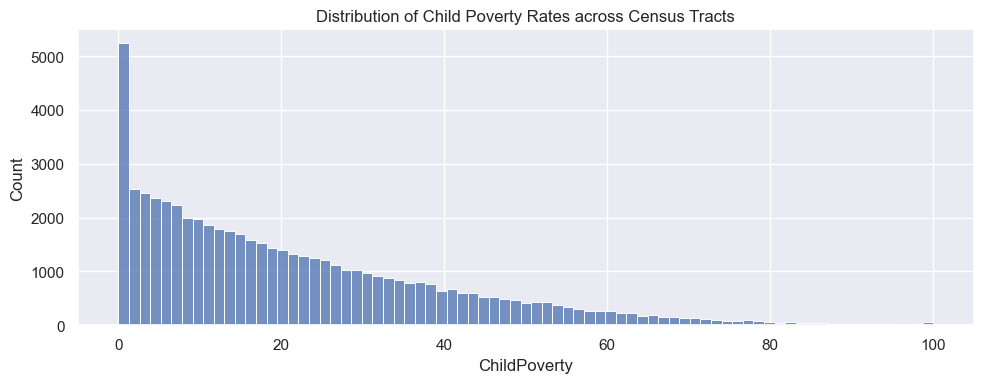

In [137]:
plt.figure(figsize=(10,4))
sns.histplot(data=y_train, x='ChildPoverty')
plt.title('Distribution of Child Poverty Rates across Census Tracts')
plt.tight_layout()

In [157]:
# create condition to replace values
def get_target_condition(df):
    conditions = [
        df['ChildPoverty'] < 6,  # low
        (df['ChildPoverty'] >= 6)& (df['ChildPoverty'] < 16),  # Medium Low 
        (df['ChildPoverty'] >= 16)& (df['ChildPoverty'] < 31),  # Medium High 
        df['ChildPoverty'] >=31  # High
    ]

    # create replacement values
    choices = [ 'Low', 'Medium Low','Medium High','High']
    return conditions, choices


In [ ]:
conditions, choices =get_target_condition(y_train)
y_train["ChildPoverty_Quantized"] = np.ones(y_train.shape[0])
y_train["ChildPoverty_Quantized"] = np.select(conditions, choices, y_train['ChildPoverty'])

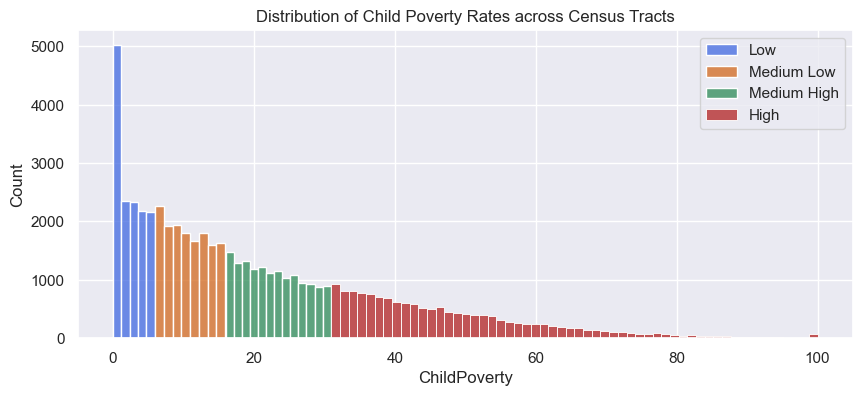

In [164]:
plt.figure(figsize=(10,4))
plt.title('Distribution of Child Poverty Rates across Census Tracts')

ax = sns.histplot(x='ChildPoverty', data=y_train[y_train.ChildPoverty_Quantized == "Low"],
                  bins=5, 
                  color='royalblue')
sns.histplot(x='ChildPoverty', data=y_train[y_train.ChildPoverty_Quantized == "Medium Low"],
             bins=8,
             color='chocolate', ax=ax)

sns.histplot(x='ChildPoverty', data=y_train[y_train.ChildPoverty_Quantized == "Medium High"],
             bins=13,
             color='seagreen', ax=ax)
sns.histplot(x='ChildPoverty', data=y_train[y_train.ChildPoverty_Quantized == "High"],
             bins=56,
             color='firebrick', ax=ax)

children = plt.gca().get_children()
plt.legend([children[0], children[6], children[15], children[27]], ['Low', 'Medium Low', 'Medium High', 'High'] )

max_low = np.max(acs_sorted[acs_sorted.ChildPoverty_Quantized == "Low"]["ChildPoverty"])
max_mediumlow = np.max(acs_sorted[acs_sorted.ChildPoverty_Quantized == "Medium Low"]["ChildPoverty"])
max_mediumhigh = np.max(acs_sorted[acs_sorted.ChildPoverty_Quantized == "Medium High"]["ChildPoverty"])
max_high = np.max(acs_sorted[acs_sorted.ChildPoverty_Quantized == "High"]["ChildPoverty"])

# use this code to visualize the cutoffs
#plt.axvline(max_low, 0,6000, color = 'blue')
#plt.axvline(max_mediumlow, 0,6000, color = 'darkorange')
#plt.axvline(max_mediumhigh, 0,6000, color = 'green')
#plt.axvline(max_high, 0,6000, color = 'r')
#plt.tight_layout()

In [159]:
conditions, choices =get_target_condition(y_test)
y_test["ChildPoverty_Quantized"] = np.ones(y_test.shape[0])
y_test["ChildPoverty_Quantized"] = np.select(conditions, choices, y_test['ChildPoverty'])

In [160]:
y_train.groupby(['ChildPoverty_Quantized'])['ChildPoverty'].min()

ChildPoverty_Quantized
High           31.0
Low             0.0
Medium High    16.0
Medium Low      6.0
Name: ChildPoverty, dtype: float64

Text(0, 0.5, 'Counts')

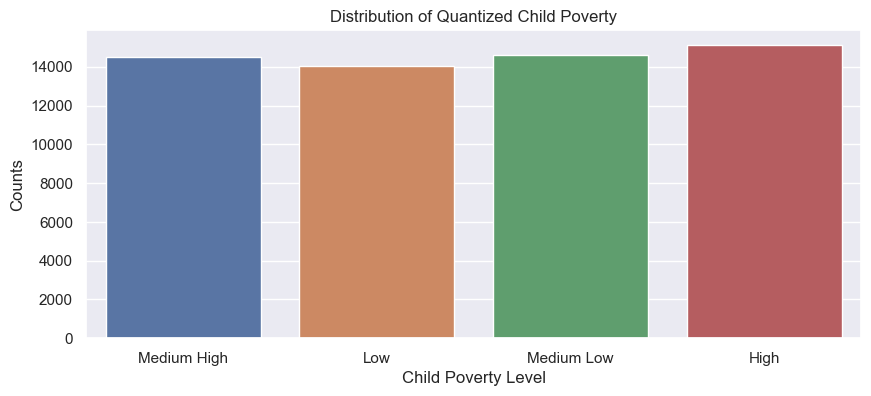

In [163]:
sns.set_theme()
plt.figure(figsize=(10,4))
sns.countplot(data=y_train, x="ChildPoverty_Quantized")
plt.title('Distribution of Quantized Child Poverty')
plt.xlabel('Child Poverty Level')
plt.ylabel('Counts')

Note that the bin widths and heights for each color group might vary slightly from the original histogram because the number of bins needed is approximated based on the maximum child povery level in each group.

+ Source for histogram colors: https://stackoverflow.com/questions/71201475/seaborn-how-to-change-the-color-of-individual-bars-in-histogram
+ Source for custom legend: https://stackoverflow.com/questions/72526706/manually-add-legend-entry-to-seaborn-legend

In [182]:
from sklearn.preprocessing import StandardScaler

X_train_normalized = pd.DataFrame(StandardScaler().fit_transform(X_train_mod.iloc[:,3:]), columns =X_train_mod.iloc[:,3:].columns)

X_test_normalized = pd.DataFrame(StandardScaler().fit_transform(X_test_mod.iloc[:,3:]), columns =X_test_mod.iloc[:,3:].columns)

In [183]:
X_train_normalized = X_train_mod.iloc[:,1:3].join(X_train_normalized)
X_test_normalized = X_train_mod.iloc[:,1:3].join(X_test_normalized)

In [184]:
X_train_normalized['State']=X_train_normalized['State'].astype('category')
X_train_normalized['County']=X_train_normalized['County'].astype('category')
X_test_normalized['State']=X_test_normalized['State'].astype('category')
X_test_normalized['County']=X_test_normalized['County'].astype('category')
X_train_normalized=X_train_normalized.reset_index(drop=True)
X_test_normalized=X_test_normalized.reset_index(drop=True)

#### Next step is to do Modelling